In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Carregando o dataset

Como o dataset está no formato .asc, ele pode ser carregado como um csv, porém indicando à função 'read_csv' que o separador é um espaço.

Após o carregamento do dataset, podemos verificar as dimensões do mesmo e as primeiras linhas para ter certeza que o dataset foi carregado corretamente

In [2]:
df = pd.read_csv('data/SouthGermanCredit.asc', sep=' ')
df.shape

(1000, 21)

In [3]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# Verificações

A descrição do dataset informa quais features o dataset possui, quantidade de dados e que não há dados nulos. Porém é bom sempre verificar que os dados realmente estão conforme a descrição.

## Colunas

In [4]:
print('Número de colunas', len(df.columns))
df.columns

Número de colunas 21


Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

## Dados

In [5]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


### Variáveis categóricas

In [6]:
cat_var = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']

cont_var = [col for col in df.columns if col not in cat_var]

In [7]:
for cat in cat_var:
    print(f'{cat}: ', np.sort(df[cat].unique()))

laufkont:  [1 2 3 4]
moral:  [0 1 2 3 4]
verw:  [ 0  1  2  3  4  5  6  8  9 10]
sparkont:  [1 2 3 4 5]
beszeit:  [1 2 3 4 5]
rate:  [1 2 3 4]
famges:  [1 2 3 4]
buerge:  [1 2 3]
wohnzeit:  [1 2 3 4]
verm:  [1 2 3 4]
weitkred:  [1 2 3]
wohn:  [1 2 3]
bishkred:  [1 2 3 4]
beruf:  [1 2 3 4]
pers:  [1 2]
telef:  [1 2]
gastarb:  [1 2]
kredit:  [0 1]


Todas as variáveis estão nos ranges descritos no arquivo codetable.txt.
A exceção é a variável 'verw' (propósito), onde não há nenhum valor na categoria 7 (educação).

### Valores nulos

In [8]:
df.isnull().sum(axis = 0)

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

Não há valores nulos em nenhuma das colunas

### Distribuição da variável 'kredit' (credit_risk)

In [9]:
df['kredit'].value_counts()

kredit
1    700
0    300
Name: count, dtype: int64

# Exploração

Com a comprovação que o dataset estã ok, podemos seguir para a exploração de cada variável e tentar tirar algumas conclusões deste dataset

## Análise das variáveis contínuas

Verificação da distribuição das variáveis contínuas, através de histogramas

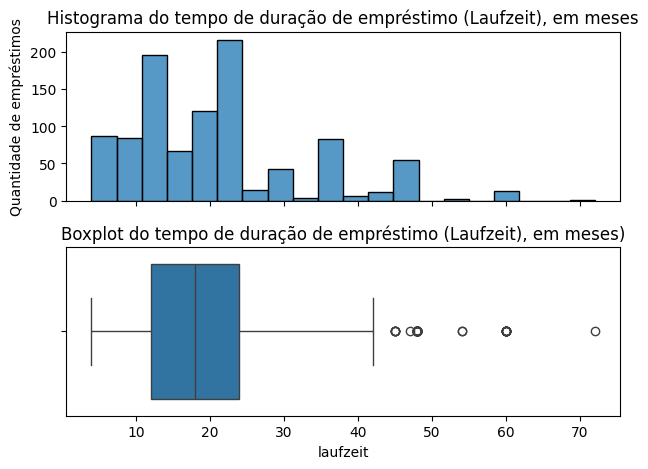

Quartil de 25%:  12.0
Quartil de 75%:  24.0
Limite máximo: 42.0
Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR): 70


In [10]:
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

sns.histplot(df['laufzeit'], kde=False, bins=20, ax=axs[0])
sns.boxplot(x=df['laufzeit'], ax=axs[1])

axs[0].set_title('Histograma do tempo de duração de empréstimo (Laufzeit), em meses')
axs[0].set_ylabel('Quantidade de empréstimos')

axs[1].set_title('Boxplot do tempo de duração de empréstimo (Laufzeit), em meses)')

plt.show()

q25 = df['laufzeit'].quantile(0.25)
q75 = df['laufzeit'].quantile(0.75)
print('Quartil de 25%: ', q25)
print('Quartil de 75%: ', q75)
range = q75 - q25
outlier = q75+1.5*range
q_outlier = df[df['laufzeit'] > outlier]['laufzeit'].count()
print('Limite máximo:', outlier)
print('Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR):', q_outlier)

A maior parte dos empréstimos possuem uma duração entre 12 e 24 meses. Empréstimos com mais de 42 meses são considerados outliers, os quais somam 70 outliers.

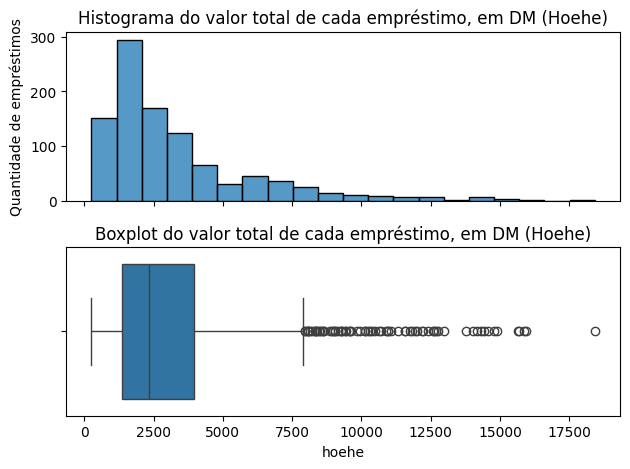

Quartil de 25%:  1365.5
Quartil de 75%:  3972.25
Limite máximo: 7882.375
Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR): 72


In [11]:
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

sns.histplot(df['hoehe'], kde=False, bins=20, ax=axs[0])
sns.boxplot(x=df['hoehe'], ax=axs[1])

axs[0].set_title('Histograma do valor total de cada empréstimo, em DM (Hoehe)')
axs[0].set_ylabel('Quantidade de empréstimos')

axs[1].set_title('Boxplot do valor total de cada empréstimo, em DM (Hoehe)')

plt.show()


q25 = df['hoehe'].quantile(0.25)
q75 = df['hoehe'].quantile(0.75)
print('Quartil de 25%: ', q25)
print('Quartil de 75%: ', q75)
range = q75 - q25
outlier = q75+1.5*range
q_outlier = df[df['hoehe'] > outlier]['hoehe'].count()
print('Limite máximo:', outlier)
print('Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR):', q_outlier)

O valor da maior parte dos empréstimos está entre DM 1365.5 e DM 3972.25, com 72 valores considerados outliers (acima de ~7882 DM)

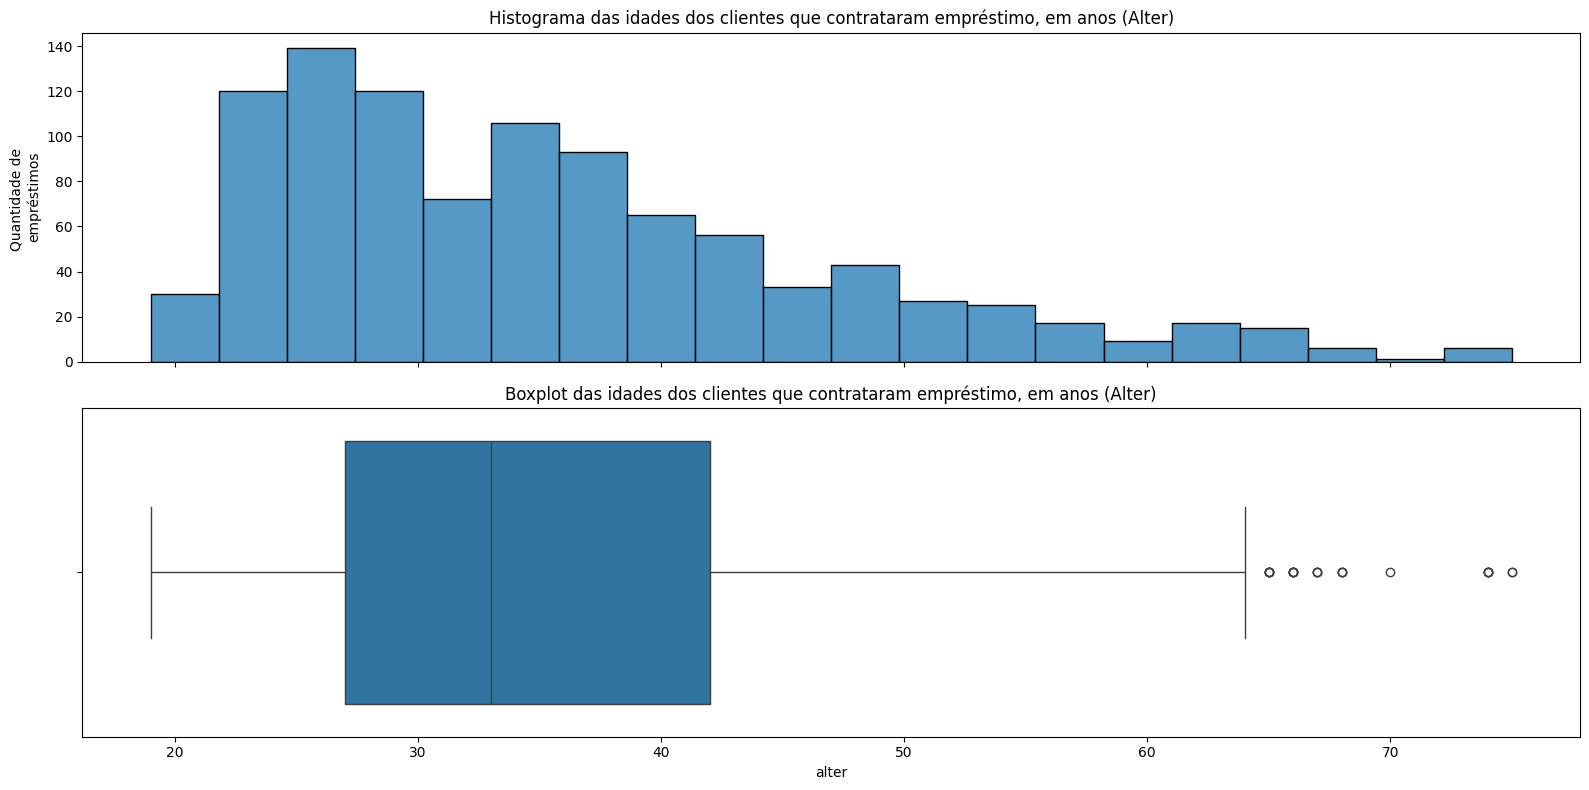

Limite máximo: 64.5
Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR): 23


In [55]:
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

sns.histplot(df['alter'], kde=False, bins=20, ax=axs[0])
sns.boxplot(x=df['alter'], ax=axs[1])

axs[0].set_title('Histograma das idades dos clientes que contrataram empréstimo, em anos (Alter)')
axs[0].set_ylabel('Quantidade de \nempréstimos')

axs[1].set_title('Boxplot das idades dos clientes que contrataram empréstimo, em anos (Alter)')

plt.show()

q25 = df['alter'].quantile(0.25)
q75 = df['alter'].quantile(0.75)
range = q75 - q25
outlier = q75+1.5*range
q_outlier = df[df['alter'] > outlier]['alter'].count()
print('Limite máximo:', outlier)
print('Quantidade de valores acima do limite máximo (Q75 + 1.5*IQR):', q_outlier)

A maior parte dos clientes possuem entre 27 e 42 anos, com 23 valores considerados outliers (acima de 64.5 anos)

## Análise das variáveis categoricas

In [13]:
# Definir função para plotar os gráficos
def plot_graph(column, labels, title, xlabel, ylabel):
    #Calcular as quantidades de cada categoria
    counts = df[column].value_counts().sort_index()

    # Plotar gráfico
    plt.bar(counts.index, counts.values)

    # Configurar legendas para apresentar a descrição das categorias
    plt.xticks(ticks=counts.index, labels=[labels[val] for val in counts.index], rotation=45)

    # Configurar título e legendas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plotar
    plt.tight_layout()
    plt.show()

In [14]:
# Definir função para plotar os gráficos
def plot_graph_h(column, labels, title, xlabel, ylabel):
    #Calcular as quantidades de cada categoria
    counts = df[column].value_counts().sort_index()

    # Plotar gráfico
    plt.barh(counts.index, counts.values)

    # Configurar legendas para apresentar a descrição das categorias
    plt.yticks(ticks=counts.index, labels=[labels[val] for val in counts.index])

    # Configurar título e legendas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plotar
    plt.tight_layout()
    plt.show()

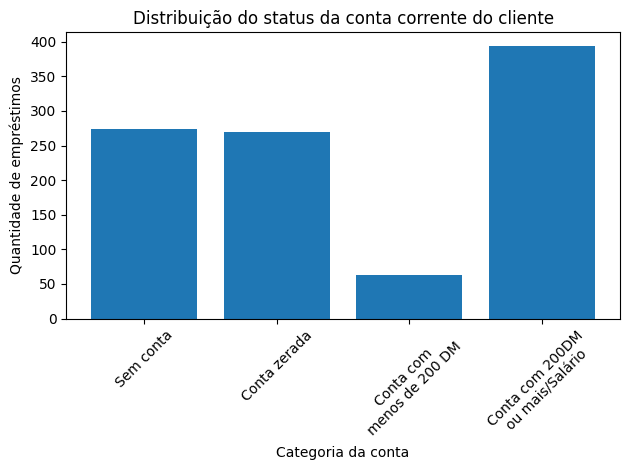

In [15]:
labels = {1: 'Sem conta', 
          2: 'Conta zerada', 
          3: 'Conta com\nmenos de 200 DM',
          4: 'Conta com 200DM\nou mais/Salário'}

title = 'Distribuição do status da conta corrente do cliente'
xlabel = 'Categoria da conta'
ylabel = 'Quantidade de empréstimos'

plot_graph('laufkont', labels, title, xlabel, ylabel)

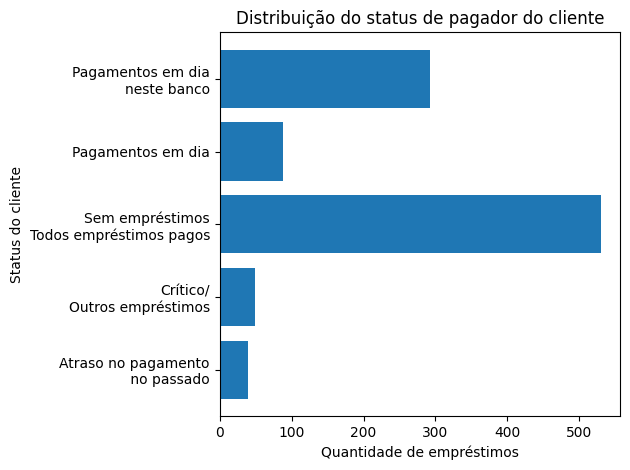

In [16]:
labels = {0: 'Atraso no pagamento\n no passado', 
          1: 'Crítico/\nOutros empréstimos', 
          2: 'Sem empréstimos\nTodos empréstimos pagos',
          3: 'Pagamentos em dia',
          4: 'Pagamentos em dia\nneste banco'}

title = 'Distribuição do status de pagador do cliente'
ylabel = 'Status do cliente'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('moral', labels, title, xlabel, ylabel)

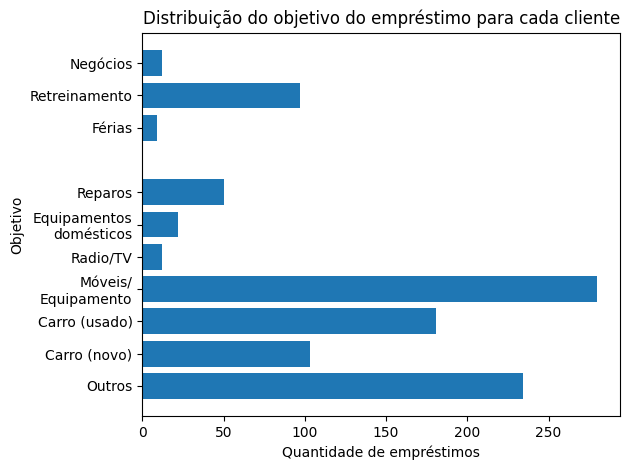

In [17]:
labels = {0: 'Outros', 
          1: 'Carro (novo)', 
          2: 'Carro (usado)',
          3: 'Móveis/\nEquipamento',
          4: 'Radio/TV',
          5: 'Equipamentos\ndomésticos',
          6: 'Reparos',
          7: 'Educação',
          8: 'Férias',
          9: 'Retreinamento',
          10: 'Negócios'}

title = 'Distribuição do objetivo do empréstimo para cada cliente'
ylabel = 'Objetivo'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('verw', labels, title, xlabel, ylabel)

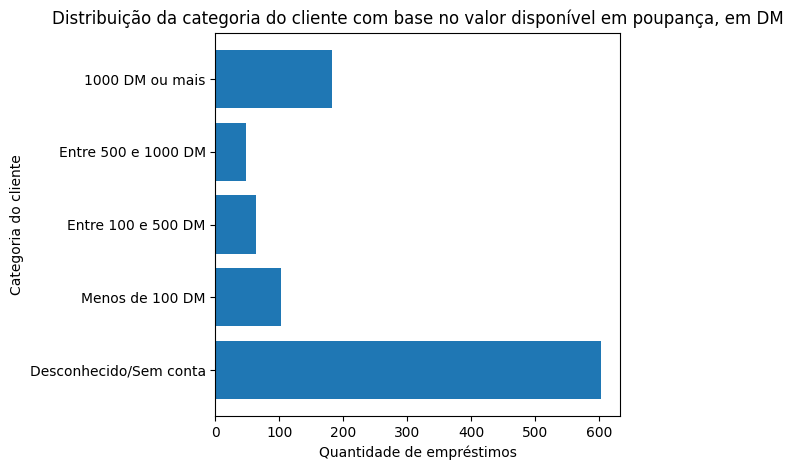

In [18]:
labels = {1: 'Desconhecido/Sem conta', 
          2: 'Menos de 100 DM', 
          3: 'Entre 100 e 500 DM',
          4: 'Entre 500 e 1000 DM',
          5: '1000 DM ou mais'}

title = 'Distribuição da categoria do cliente com base no valor disponível em poupança, em DM'
ylabel = 'Categoria do cliente'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('sparkont', labels, title, xlabel, ylabel)

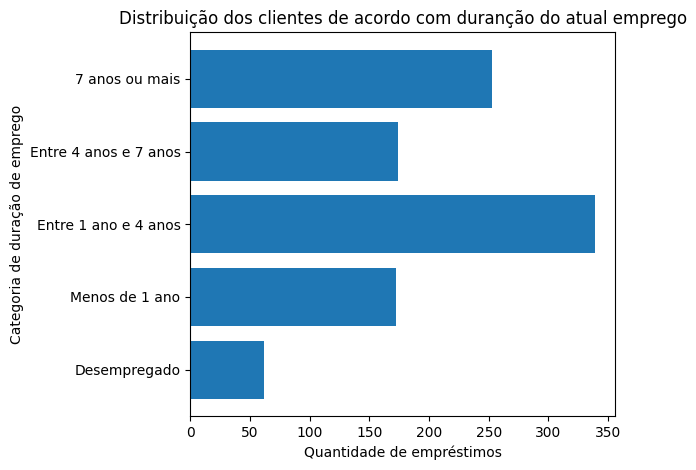

In [19]:
labels = {1: 'Desempregado', 
          2: 'Menos de 1 ano', 
          3: 'Entre 1 ano e 4 anos',
          4: 'Entre 4 anos e 7 anos',
          5: '7 anos ou mais'}

title = 'Distribuição dos clientes de acordo com duranção do atual emprego'
ylabel = 'Categoria de duração de emprego'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('beszeit', labels, title, xlabel, ylabel)

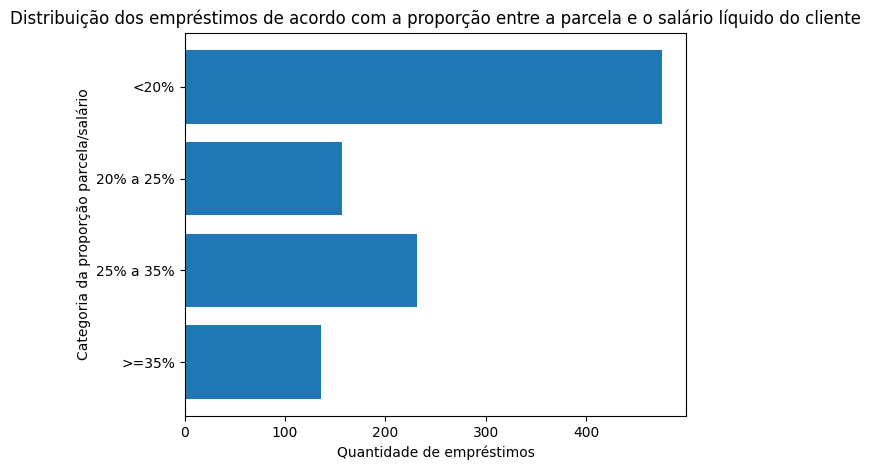

In [20]:
labels = {1: '>=35%', 
          2: '25% a 35%', 
          3: '20% a 25%',
          4: '<20%'}

title = 'Distribuição dos empréstimos de acordo com a proporção entre a parcela e o salário líquido do cliente'
ylabel = 'Categoria da proporção parcela/salário'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('rate', labels, title, xlabel, ylabel)

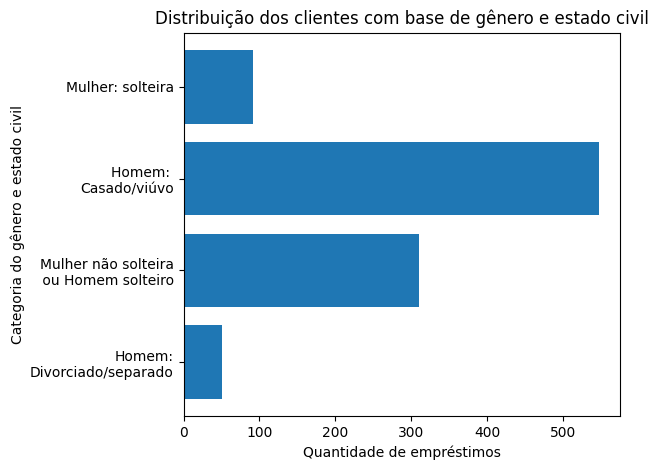

In [21]:
# sns.countplot(x=df['famges'])

labels = {1: 'Homem:\nDivorciado/separado', 
                 2: 'Mulher não solteira\n ou Homem solteiro', 
                 3: 'Homem: \nCasado/viúvo',
                 4: 'Mulher: solteira'}

title = 'Distribuição dos clientes com base de gênero e estado civil'
ylabel = 'Categoria do gênero e estado civil'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('famges', labels, title, xlabel, ylabel)

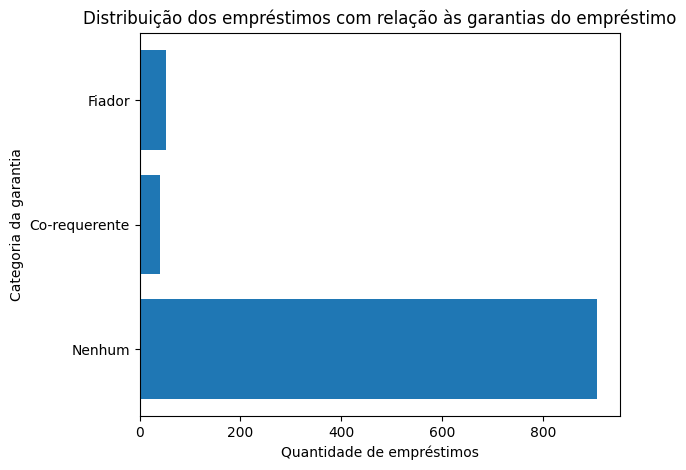

In [22]:
labels = {1: 'Nenhum', 2: 'Co-requerente', 3: 'Fiador'}

title = 'Distribuição dos empréstimos com relação às garantias do empréstimo'
ylabel = 'Categoria da garantia'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('buerge', labels, title, xlabel, ylabel)

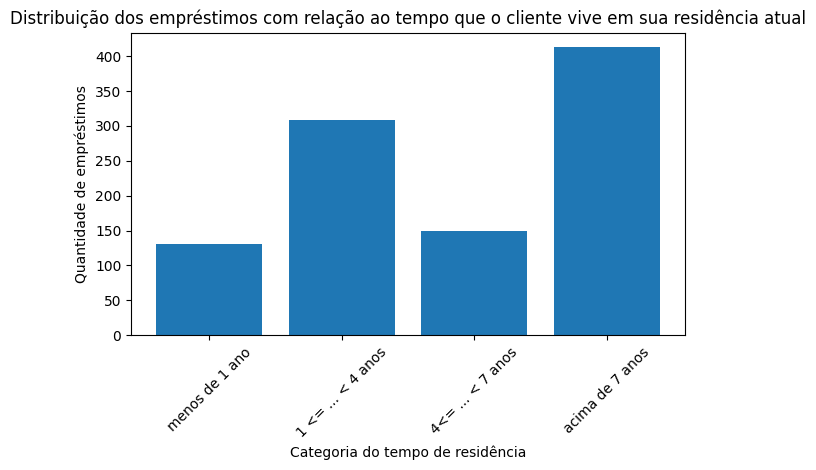

In [23]:
labels = {1: 'menos de 1 ano', 2: '1 <= ... < 4 anos', 3: '4<= ... < 7 anos', 4: 'acima de 7 anos'}

title = 'Distribuição dos empréstimos com relação ao tempo que o cliente vive em sua residência atual'
xlabel = 'Categoria do tempo de residência'
ylabel = 'Quantidade de empréstimos'

plot_graph('wohnzeit', labels, title, xlabel, ylabel)

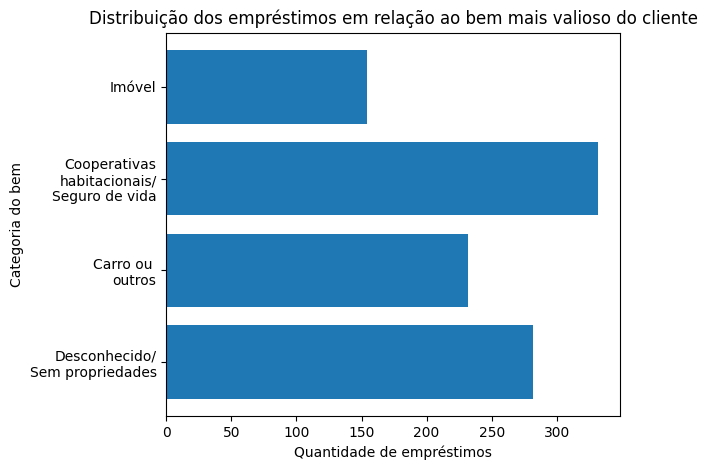

In [24]:
labels = {1: 'Desconhecido/\nSem propriedades', 
          2: 'Carro ou \noutros', 
          3: 'Cooperativas\nhabitacionais/\nSeguro de vida', 
          4: 'Imóvel'}

title = 'Distribuição dos empréstimos em relação ao bem mais valioso do cliente'
ylabel = 'Categoria do bem'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('verm', labels, title, xlabel, ylabel)

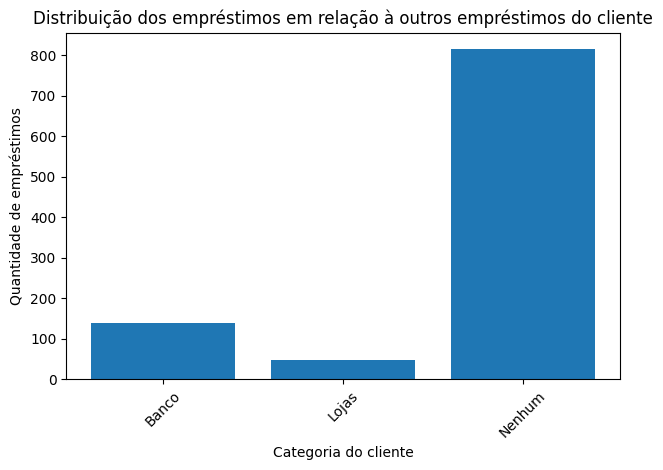

In [25]:
labels = {1: 'Banco', 
          2: 'Lojas', 
          3: 'Nenhum'}

title = 'Distribuição dos empréstimos em relação à outros empréstimos do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('weitkred', labels, title, xlabel, ylabel)

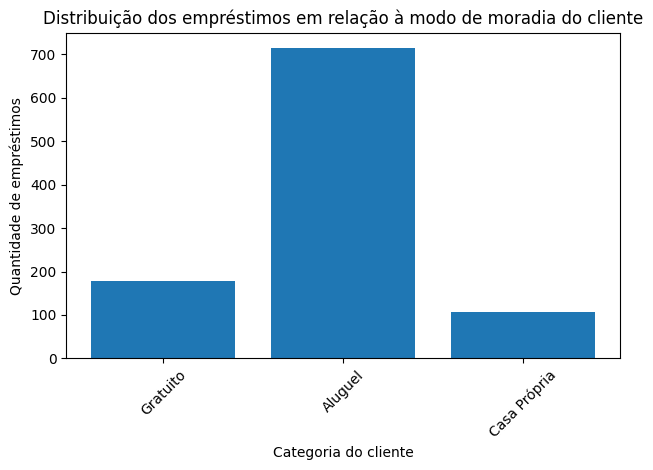

In [26]:
labels = {1: 'Gratuito', 
          2: 'Aluguel', 
          3: 'Casa Própria'}

title = 'Distribuição dos empréstimos em relação à modo de moradia do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('wohn', labels, title, xlabel, ylabel)

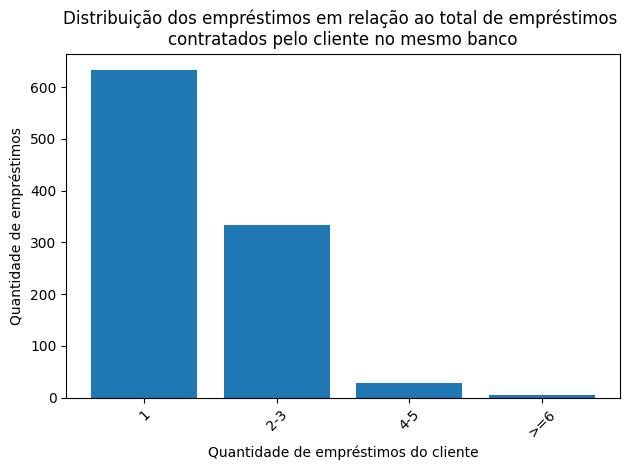

In [27]:
labels = {1: '1', 
          2: '2-3', 
          3: '4-5',
          4: '>=6'}

title = 'Distribuição dos empréstimos em relação ao total de empréstimos \ncontratados pelo cliente no mesmo banco'
xlabel = 'Quantidade de empréstimos do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('bishkred', labels, title, xlabel, ylabel)

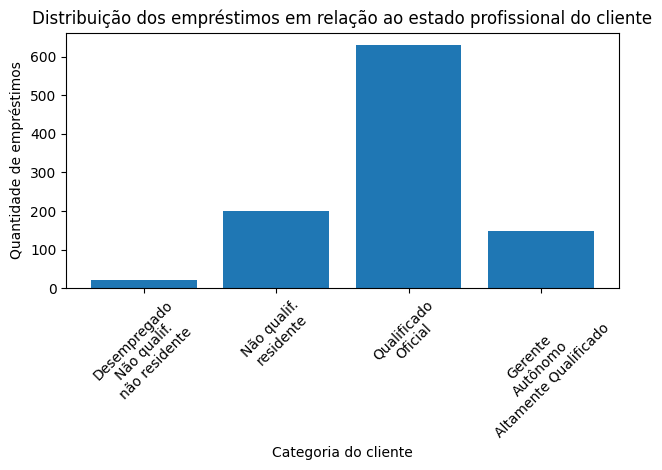

In [28]:
labels = {1: 'Desempregado\nNão qualif.\nnão residente', 
          2: 'Não qualif.\nresidente', 
          3: 'Qualificado\nOficial',
          4: 'Gerente\nAutônomo\nAltamente Qualificado'}

title = 'Distribuição dos empréstimos em relação ao estado profissional do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('beruf', labels, title, xlabel, ylabel)

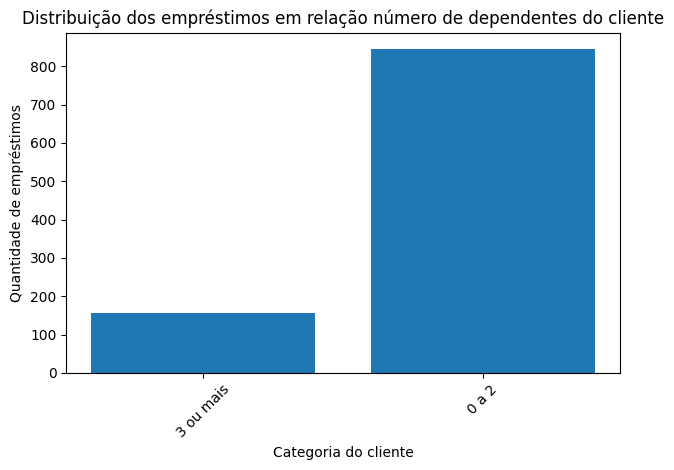

In [29]:
labels = {1: '3 ou mais', 
          2: '0 a 2'}

title = 'Distribuição dos empréstimos em relação número de dependentes do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('pers', labels, title, xlabel, ylabel)

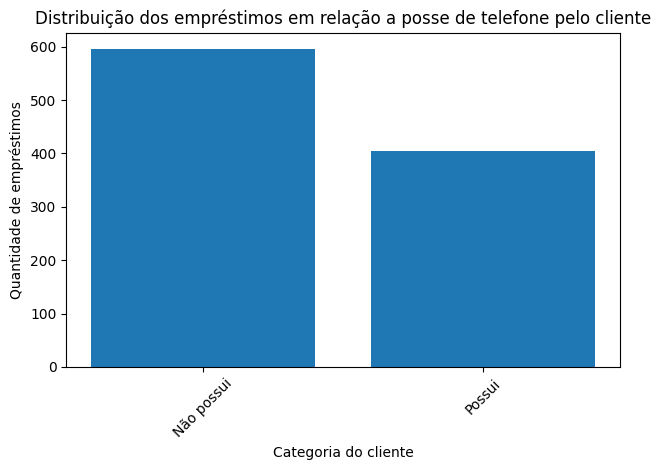

In [30]:
labels = {1: 'Não possui', 
          2: 'Possui'}

title = 'Distribuição dos empréstimos em relação a posse de telefone pelo cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('telef', labels, title, xlabel, ylabel)

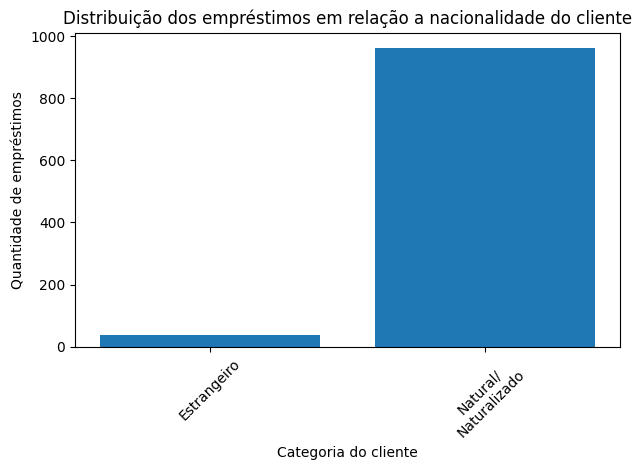

In [31]:
labels = {1: 'Estrangeiro', 
          2: 'Natural/\nNaturalizado'}

title = 'Distribuição dos empréstimos em relação a nacionalidade do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('gastarb', labels, title, xlabel, ylabel)

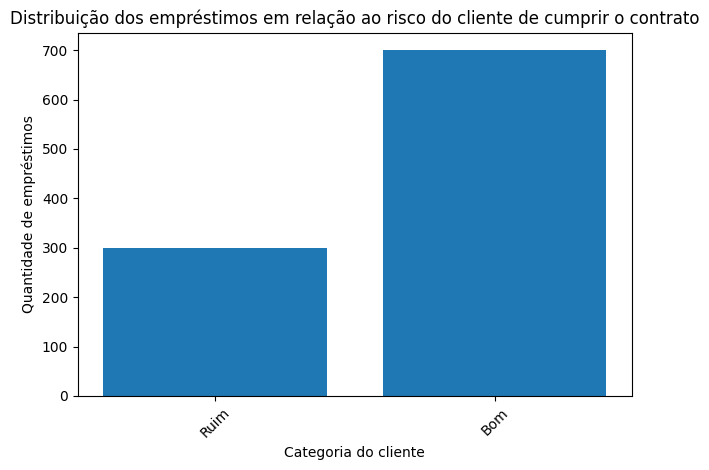

In [32]:
labels = {0: 'Ruim', 
          1: 'Bom'}

title = 'Distribuição dos empréstimos em relação ao risco do cliente de cumprir o contrato'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade de empréstimos'

plot_graph('kredit', labels, title, xlabel, ylabel)

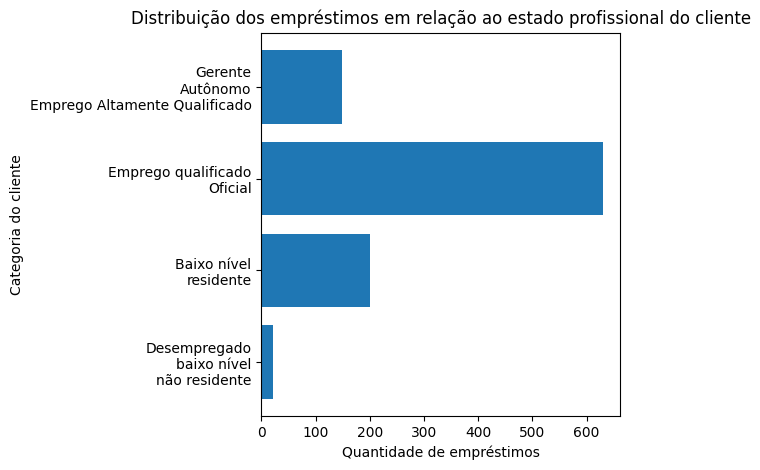

In [33]:
labels = {1: 'Desempregado\nbaixo nível\nnão residente', 
          2: 'Baixo nível\nresidente', 
          3: 'Emprego qualificado\nOficial',
          4: 'Gerente\nAutônomo\nEmprego Altamente Qualificado'}

title = 'Distribuição dos empréstimos em relação ao estado profissional do cliente'
ylabel = 'Categoria do cliente'
xlabel = 'Quantidade de empréstimos'

plot_graph_h('beruf', labels, title, xlabel, ylabel)

## Conclusões iniciais

Os clientes geralmente:

- Contrataram empréstimos entre 1365.5 e 3972.25 DM
- Assinaram contratos de atẽ 2 anos
- Possuem entre 27 e 42 anos
- Não possui conta corrente no banco ou possuem contas zeradas
- Nunca contratou um empréstimo ou pagou todos completamente
- Contratam empréstimo para compra de móveis/equipamentos ou carros
- Possuem menos de 100 DM em poupança
- Possuem emprego, frequentemente entre 1 e 4 anos
- Contratou um empréstimo cujas parcelas são de até 20% de seu salário líquido
- Contraram o empréstimo sem garantias nem fiadores
- Vivem em suas residências por mais de 7 anos
- Possuem suas residências ou apólices de seguro de vida como seu bem mais valioso
- Não possui outro empréstimo em paralelo
- Moram de aluguel
- Contrataram seu primeiro contrato do tipo
- Possuem empregos com média ou alta qualificação
- Possuem até dois dependentes
- Não possuíam telefone próprio quando contrataram o empréstimo
- Eram cidadãos alemães
- Pagaram seus contratos completamente

## Correlações entre variáveis

Vamos analisar correlações entre as variáveis e a classificação de crédito de cada evento

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
laufkont,1.00,-0.07,0.19,0.03,-0.04,0.22,0.11,-0.01,0.04,-0.13,-0.04,-0.03,0.06,0.07,0.02,0.08,0.04,0.01,0.07,0.04,0.35
laufzeit,-0.07,1.00,-0.08,0.15,0.62,0.05,0.06,0.07,0.01,-0.02,0.03,0.30,-0.04,-0.06,0.15,-0.01,0.21,0.02,0.16,0.13,-0.21
moral,0.19,-0.08,1.00,-0.09,-0.06,0.04,0.14,0.04,0.04,-0.04,0.06,-0.05,0.15,0.16,0.06,0.44,0.01,-0.01,0.05,-0.03,0.23
verw,0.03,0.15,-0.09,1.00,0.07,-0.02,0.02,0.05,0.00,-0.02,-0.04,0.01,-0.00,-0.10,0.01,0.05,0.01,0.03,0.08,0.11,-0.02
hoehe,-0.04,0.62,-0.06,0.07,1.00,0.06,-0.01,-0.27,-0.02,-0.03,0.03,0.31,0.03,-0.07,0.13,0.02,0.29,-0.02,0.28,0.03,-0.15
sparkont,0.22,0.05,0.04,-0.02,0.06,1.00,0.12,0.02,0.02,-0.11,0.09,0.02,0.08,0.00,0.01,-0.02,0.01,-0.03,0.09,-0.01,0.18
beszeit,0.11,0.06,0.14,0.02,-0.01,0.12,1.00,0.13,0.11,-0.01,0.25,0.09,0.26,-0.01,0.12,0.13,0.10,-0.10,0.06,0.02,0.12
rate,-0.01,0.07,0.04,0.05,-0.27,0.02,0.13,1.00,0.12,-0.01,0.05,0.05,0.06,0.01,0.09,0.02,0.10,0.07,0.01,0.09,-0.07
famges,0.04,0.01,0.04,0.00,-0.02,0.02,0.11,0.12,1.00,0.05,-0.03,-0.01,0.01,-0.03,0.10,0.06,-0.01,-0.12,0.03,-0.07,0.09
buerge,-0.13,-0.02,-0.04,-0.02,-0.03,-0.11,-0.01,-0.01,0.05,1.00,-0.03,-0.16,-0.03,-0.04,-0.07,-0.03,-0.06,-0.02,-0.08,-0.14,0.03


De acordo com as definições clássicas de correlação, temos apenas uma relação considerada baixa (status de conta corrente x risco do crédito), e 7 muito baixas (duração do contrato, histórico de crédito, valor do contrato, poupança, duração do emprego, propriedades e se o cliente possui outros empréstimos).

Vamos analisar cada uma delas em detalhe

In [35]:
plt.rcParams["figure.figsize"] = (16,8)

### Relações entre variáveis categoricas

In [47]:
def plot_categorical_graph(df, feature, title, labels):
    # Separar os valores com base no risco de crédito
    x_values = np.sort(df[feature].unique())
    bad_credit = []
    good_credit = []

    for i in x_values:
        bad_credit.append(df[(df[feature] == i) & (df['kredit'] == 0)][feature].count())
        good_credit.append(df[(df[feature] == i) & (df['kredit'] == 1)][feature].count())

    # Plotar o gráfico
    width = 0.3
    plt.bar(x_values-(width/2), bad_credit, width, color='blue') 
    plt.bar(x_values+(width/2), good_credit, width, color='orange') 

    plt.xticks(x_values, labels) 
    plt.legend(["Ruim", "Bom"]) 
    plt.title(title)
    plt.ylabel('Quantidade de contratos')
    plt.show() 

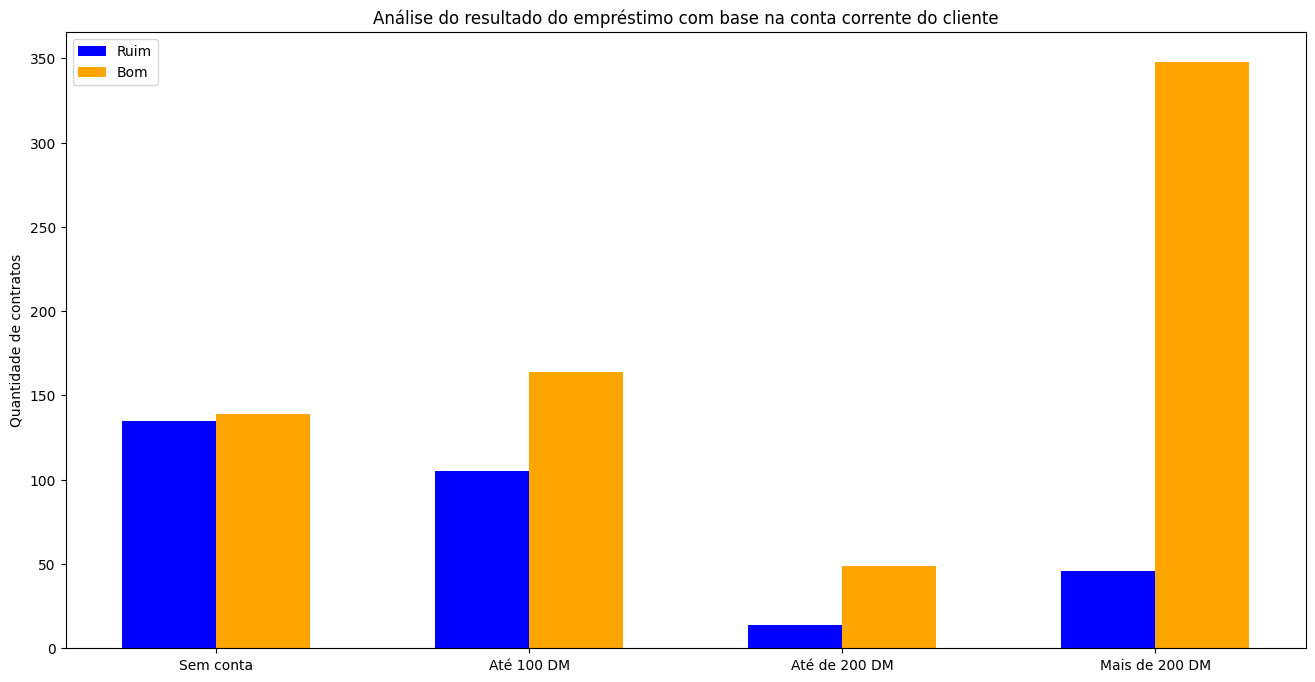

In [48]:
feature = 'laufkont'
labels = ['Sem conta', 'Até 100 DM', 'Até de 200 DM', 'Mais de 200 DM']
title = 'Análise do resultado do empréstimo com base na conta corrente do cliente'

plot_categorical_graph(df, feature, title, labels)

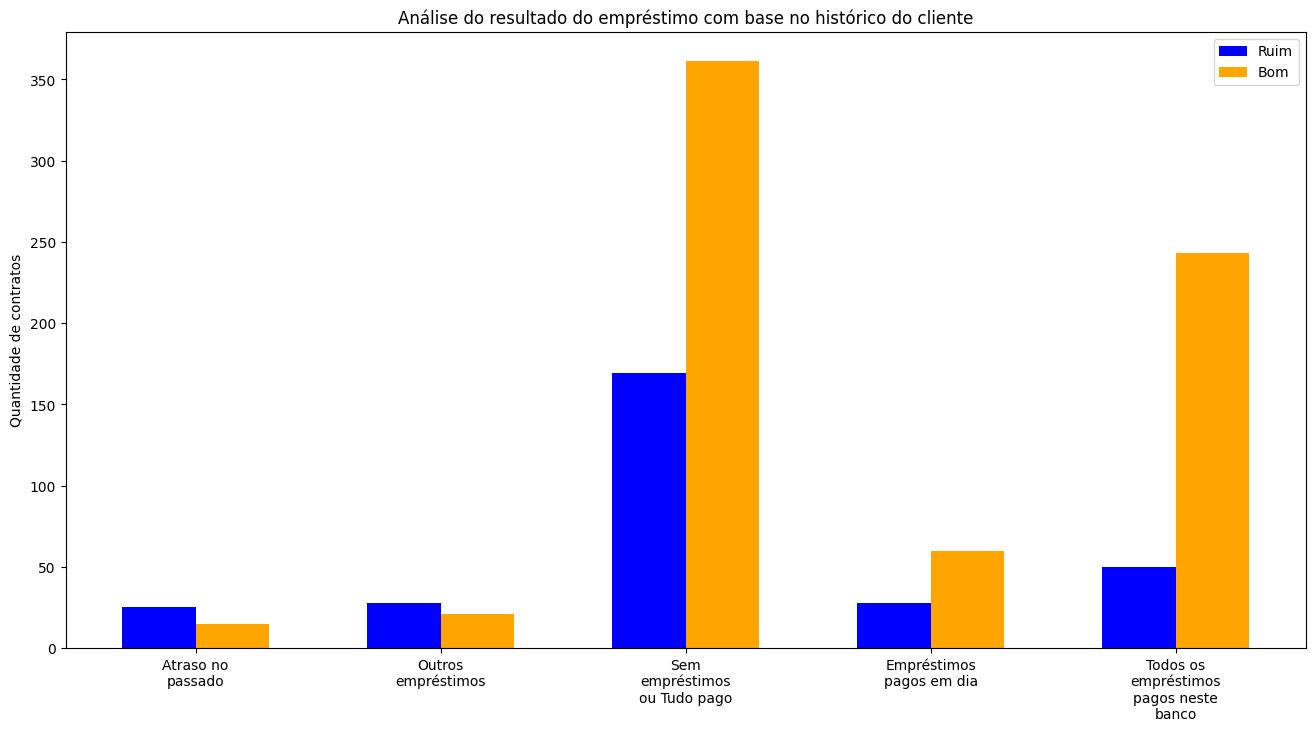

In [49]:
feature = 'moral'
labels = ['Atraso no\npassado', 'Outros\nempréstimos', 'Sem\nempréstimos\nou Tudo pago', 'Empréstimos\npagos em dia', 'Todos os\nempréstimos\npagos neste\nbanco']
title = 'Análise do resultado do empréstimo com base no histórico do cliente'

plot_categorical_graph(df, feature, title, labels)

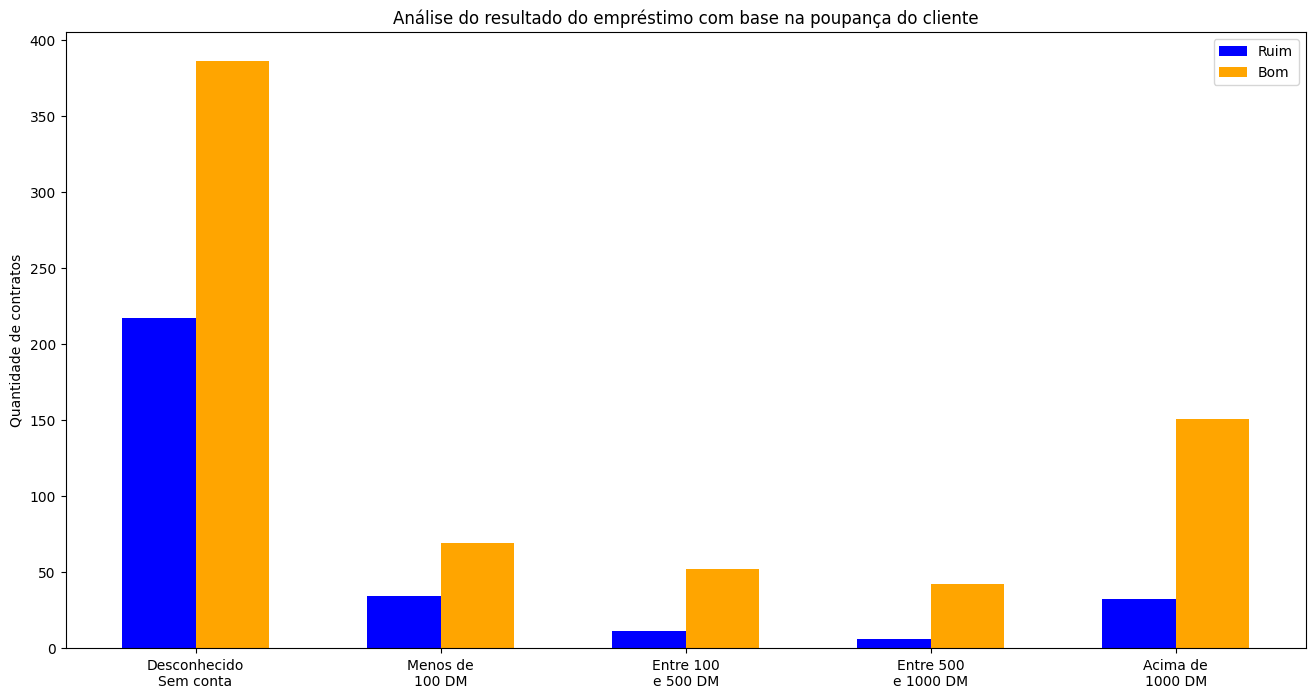

In [50]:
feature = 'sparkont'
labels = ['Desconhecido\nSem conta', 'Menos de\n100 DM', 'Entre 100\ne 500 DM', 'Entre 500\ne 1000 DM', 'Acima de\n1000 DM']
title = 'Análise do resultado do empréstimo com base na poupança do cliente'

plot_categorical_graph(df, feature, title, labels)

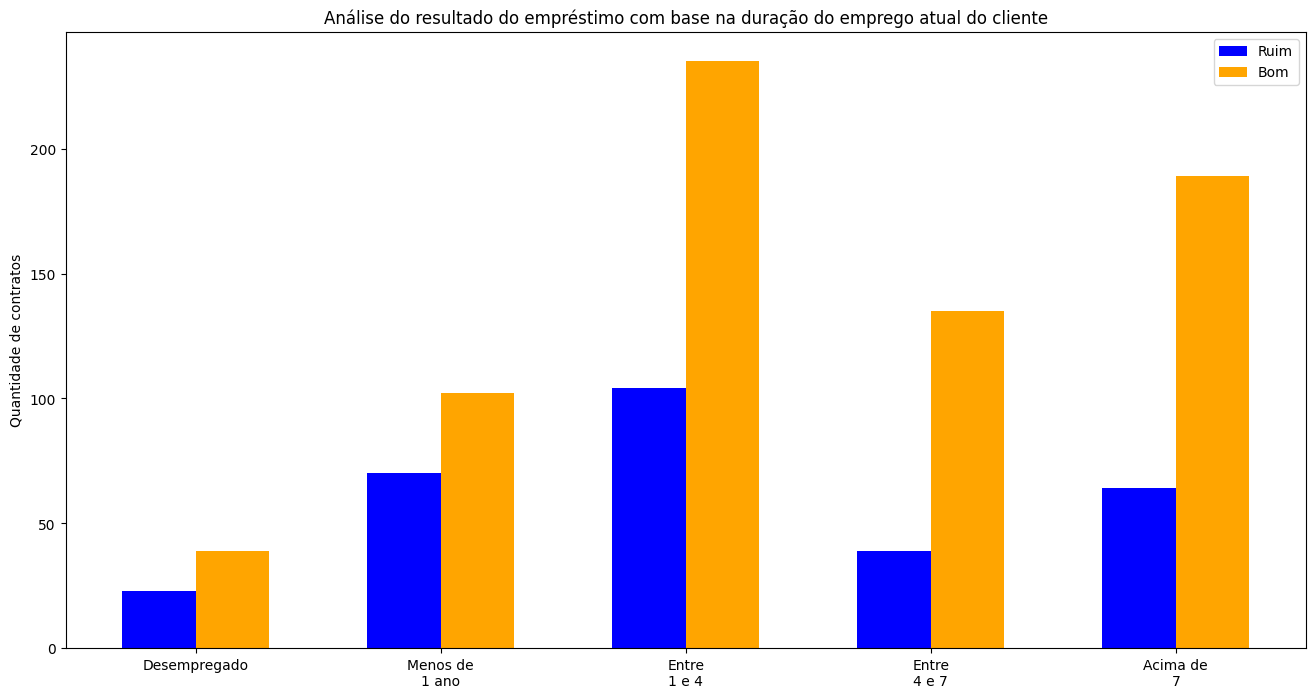

In [51]:
feature = 'beszeit'
labels = ['Desempregado', 'Menos de\n1 ano', 'Entre\n1 e 4', 'Entre\n4 e 7', 'Acima de\n7']
title = 'Análise do resultado do empréstimo com base na duração do emprego atual do cliente'

plot_categorical_graph(df, feature, title, labels)

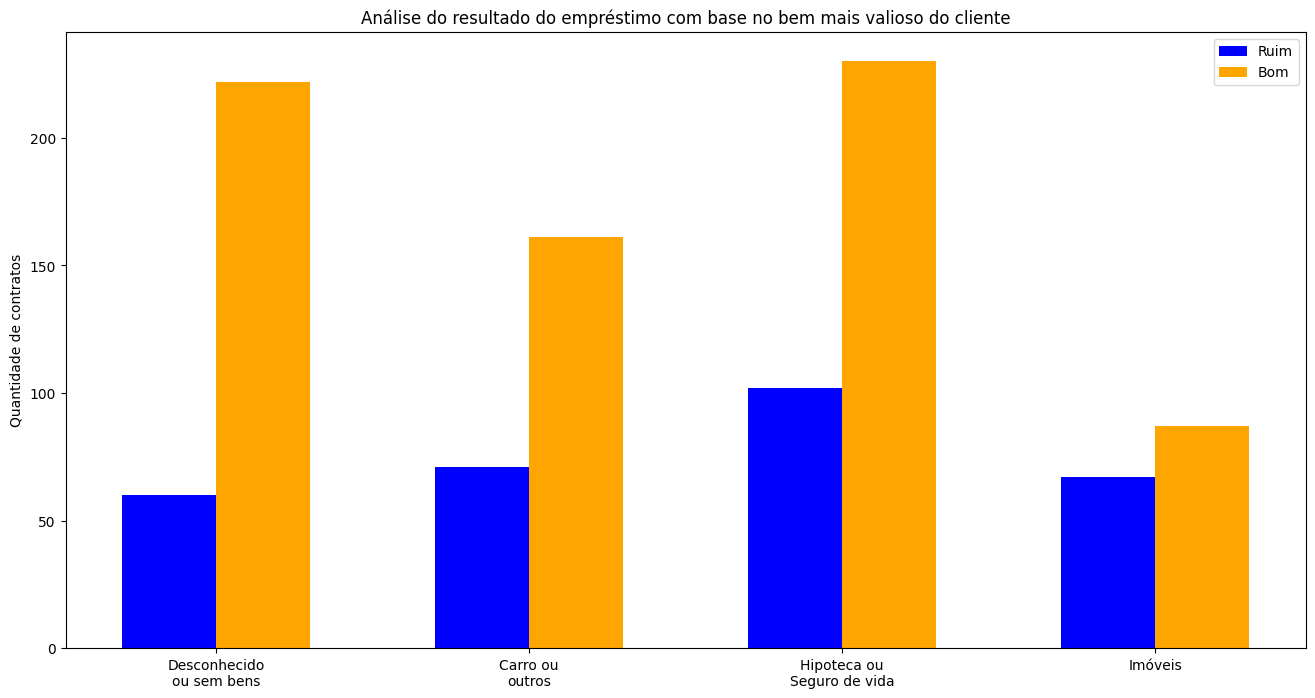

In [52]:
feature = 'verm'
labels = ['Desconhecido\nou sem bens', 'Carro ou\noutros', 'Hipoteca ou\nSeguro de vida', 'Imóveis']
title = 'Análise do resultado do empréstimo com base no bem mais valioso do cliente'

plot_categorical_graph(df, feature, title, labels)

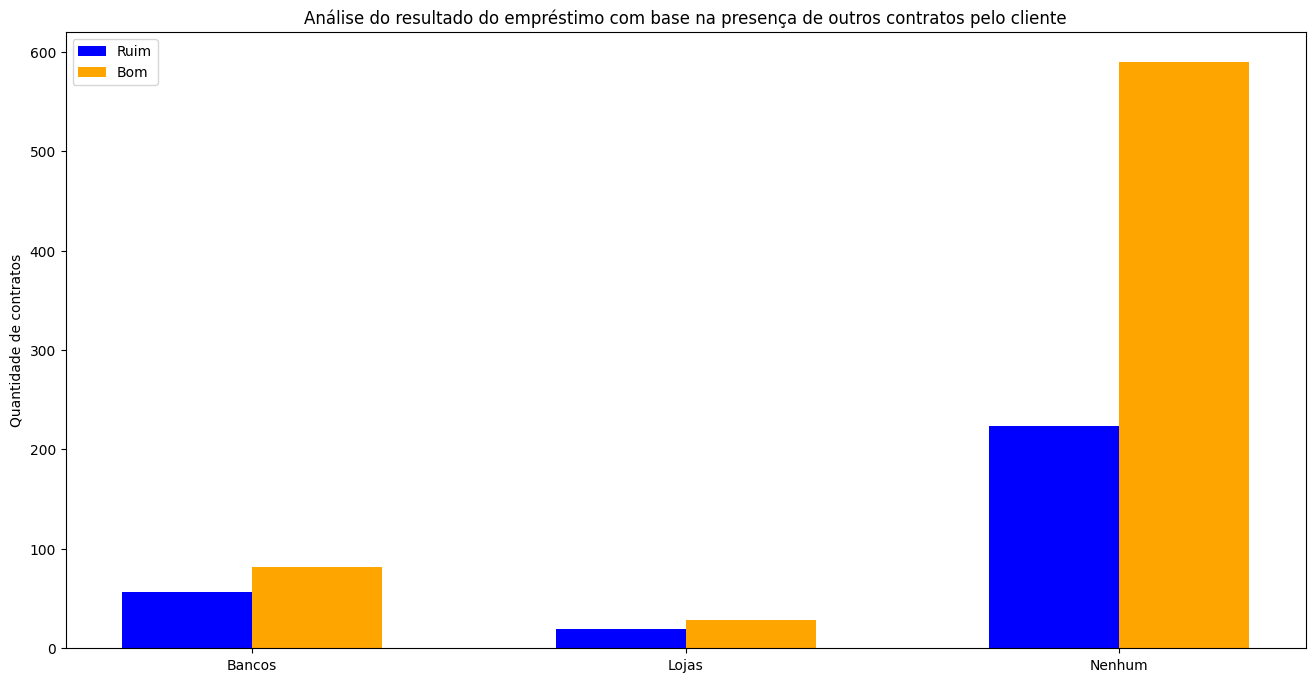

In [53]:
feature = 'weitkred'
labels = ['Bancos', 'Lojas', 'Nenhum']
title = 'Análise do resultado do empréstimo com base na presença de outros contratos pelo cliente'

plot_categorical_graph(df, feature, title, labels)

### Relações entre variáveis contínuas

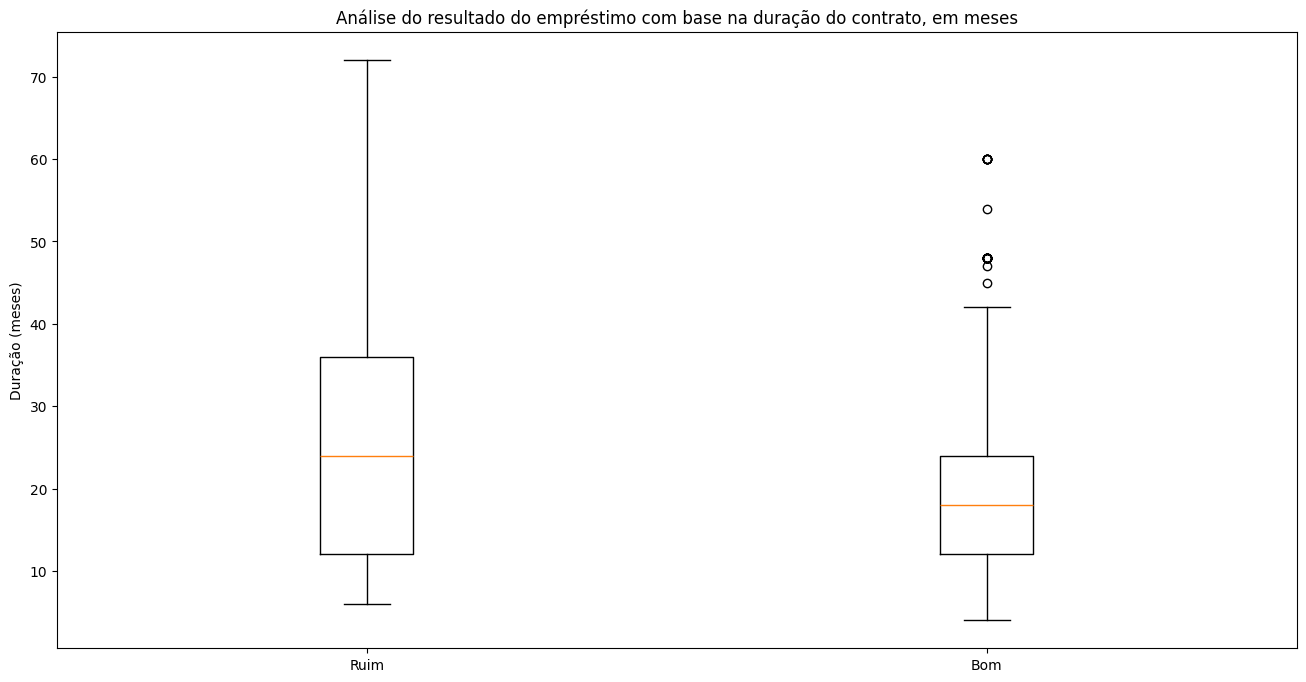

In [42]:
# Separar os valores com base no risco de crédito
bad_credit = df[df['kredit'] == 0]['laufzeit'].to_list()
good_credit = df[df['kredit'] == 1]['laufzeit'].to_list()

plt.boxplot([bad_credit, good_credit], tick_labels=['Ruim', 'Bom'])
plt.title('Análise do resultado do empréstimo com base na duração do contrato, em meses')
plt.ylabel('Duração (meses)')
plt.show()

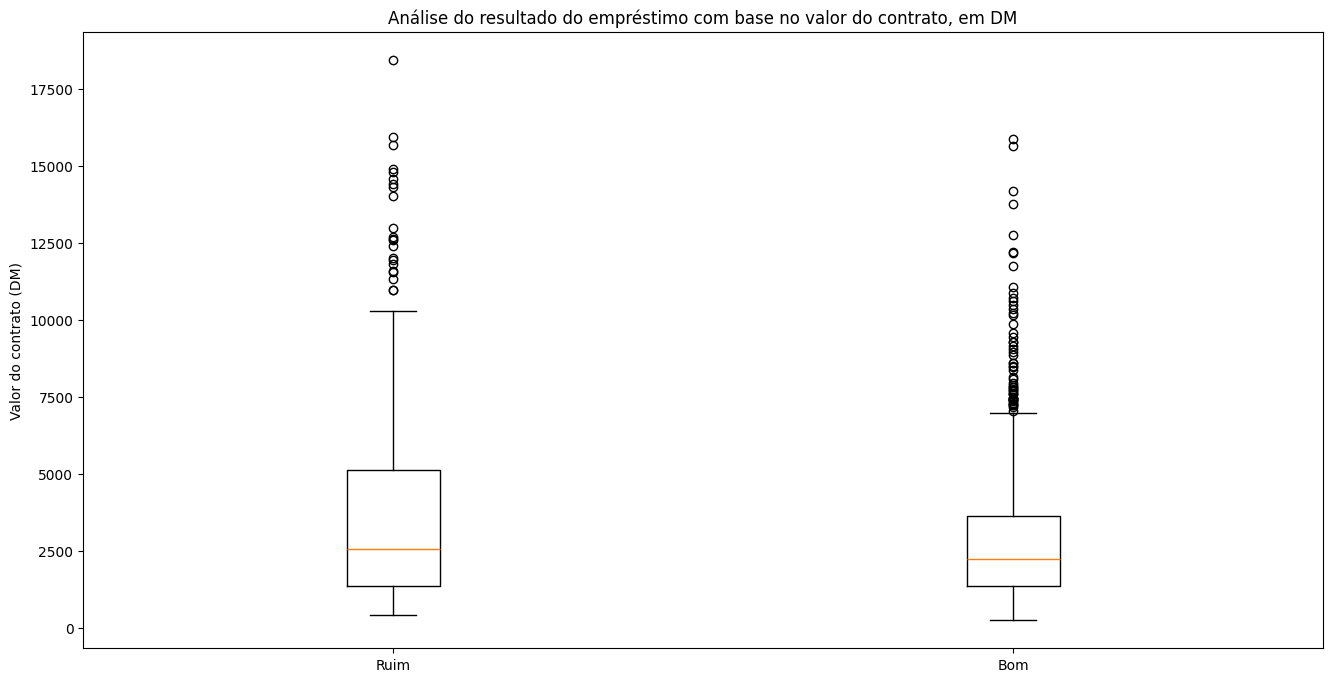

In [43]:
bad_credit = df[df['kredit'] == 0]['hoehe'].to_list()
good_credit = df[df['kredit'] == 1]['hoehe'].to_list()

plt.boxplot([bad_credit, good_credit], tick_labels=['Ruim', 'Bom'])
plt.title('Análise do resultado do empréstimo com base no valor do contrato, em DM')
plt.ylabel('Valor do contrato (DM)')
plt.show()

### Conclusões

Das relações acima podemos concluir:
- Os clientes com mais de 100 DM na conta corrente tendem a pagar seus empréstimos adequadamente. Já os clientes sem conta possuem ~50% de chance de não pagar corretamente
- Os clientes que já atrasaram pagamentos no passado, ou os que possuem outros empréstimos possuem uma maior chance de não pagarem os novos contratos. Já a maioria dos clientes que pagaram seus empréstimos no passado também pagaram o empréstimo presente no dataset.
- Clientes com mais de 100 DM na poupança tem mais chances de pagar seus empréstimos
- Clientes com mais de 1 ano no atual emprego tem mais chances ter bom crédito
- Uma proporção maior dos clientes que emprestaram dinheiro, cujo bem mais valioso é uma casa não pagaram seus contratos adequadamente
- Clientes com outros empréstimos ou financiamentos tem mais chances de não pagar os seus empréstimos do que aqueles que não possuem nenhum dos dois
- Contratos mais curtos ou de menor valor possuem mais chances de serem pagos

### Outras análises

A análise das features mais importantes no LightGBM e no RandomForestClassifier que as features mais importantes estão listadas acima (laufkont, laufzeit e hoehe). No caso do RandomForest, a idade do cliente (alter) também apresentou alta importância. Esta variável está na quinta posição no caso da LightGBM.

Analisando as 5 features mais importantes de cada modelo, foi possível notar algumas muito próximas em valor da que foi classificada em quinto lugar. 
A variável verw (objetivo do empréstimo) aparece no LightGBM e no RandomForest.

Decidi analisar estas features em detalhe.

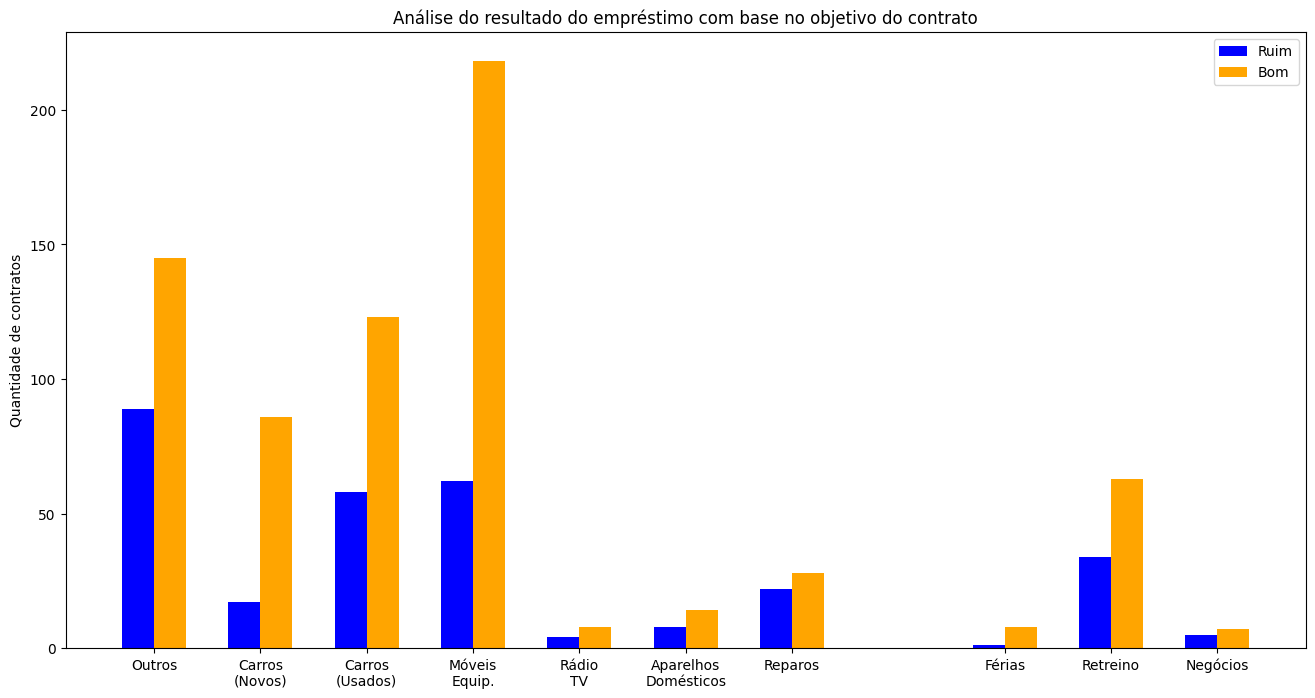

In [54]:
feature = 'verw'
labels = ['Outros', 'Carros\n(Novos)', 'Carros\n(Usados)', 'Móveis\nEquip.', 'Rádio\nTV', 'Aparelhos\nDomésticos', 'Reparos', 'Férias', 'Retreino', 'Negócios']
title = 'Análise do resultado do empréstimo com base no objetivo do contrato'

plot_categorical_graph(df, feature, title, labels)

Esta análise aponta que os melhores pagadores são aqueles que possuem o objetivo de adquirir:
- Móveis/Equipamentos
- Carros (novos)
- Férias

E os com as maiores taxas de contratos ruins são aqueles que desejam investir em um negócio

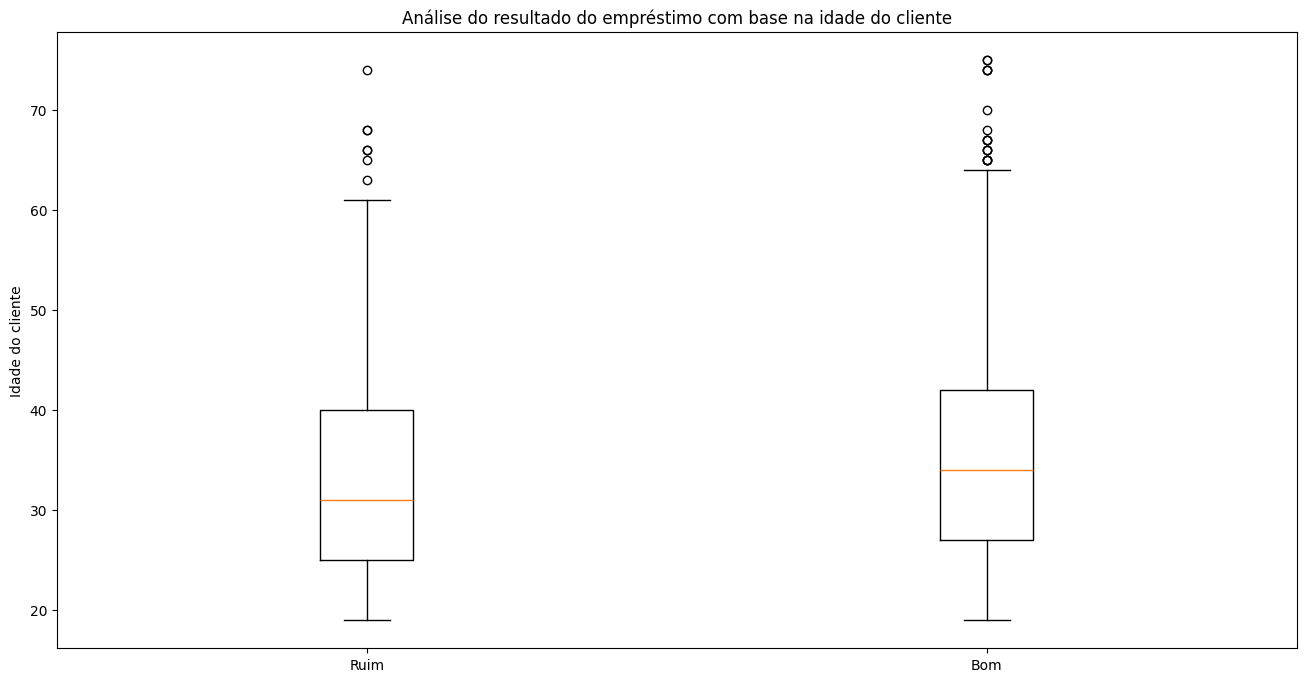

In [45]:
bad_credit = df[df['kredit'] == 0]['alter'].to_list()
good_credit = df[df['kredit'] == 1]['alter'].to_list()

plt.boxplot([bad_credit, good_credit], tick_labels=['Ruim', 'Bom'])
plt.title('Análise do resultado do empréstimo com base na idade do cliente')
plt.ylabel('Idade do cliente')
plt.show()

Apesar de ser apontado como uma variável importante pelos modelos, a idade não apresenta uma diferença tão significativa entre os contratos bons e os ruins.